In [289]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

## Helpers

In [290]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

## Download the dataset

In [291]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2019)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2019)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

## Your work

## Data check and questions

In [292]:
# I do not want to run everything from before in case I erase some column, so I save them as csv
df_wta.to_csv("df_wta.csv", index=False)
df_atp.to_csv("df_atp.csv", index=False)

In [293]:
df_wta = pd.read_csv("df_wta.csv")
df_atp = pd.read_csv("df_atp.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (25,28,34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (11,12,15,16,17,18,24,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [294]:
# I though I would have to create the dataframes but this also given, 
# so we can just check the short questions from the test
# First we take a look to the data inside to get an idea of what we have
# I am going to let all the calls even if the notebook becomes longer since 
# I guess this is more to get idea of my working process that a final clean version

# We have many columns and enough datapoints
# I am not a professional on Tennis but I guess we are going to have np.nan in allmost all the rows because 
# some of the columns are the rounds, and not all the matches have the same number of matches.
# We are going to check which columns are necessary to be filled and which are optional, replacing them with 
# a more tratable value, 0 
df_atp.shape

(52298, 54)

In [295]:
pd.set_option("display.max_columns",54) # I want to see a bit all the columns at the start and the end
df_atp.head(3)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,6.0,4.0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5,56,6.0,3.0,6,3,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40,655,6.0,7.0,7,5,6.0,3,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
df_atp.tail(3)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
52295,67,London,Masters Cup,2018-11-17,Masters Cup,Indoor,Hard,Semifinals,3,Zverev A.,Federer R.,5,3,7.0,5.0,7,6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,1.36,NaN,NaN,3.2,1.42,3.24,1.41,5085.0,6020.0,NaN,NaN,NaN,NaN,NaN,NaN,3.40,1.45,3.14,1.38
52296,67,London,Masters Cup,2018-11-17,Masters Cup,Indoor,Hard,Semifinals,3,Djokovic N.,Anderson K.,1,6,6.0,2.0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.11,7.00,NaN,NaN,1.14,7.00,1.12,7.72,8045.0,4310.0,NaN,NaN,NaN,NaN,NaN,NaN,1.15,7.72,1.12,6.52
52297,67,London,Masters Cup,2018-11-18,Masters Cup,Indoor,Hard,The Final,3,Zverev A.,Djokovic N.,5,1,6.0,4.0,6,3,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,1.14,NaN,NaN,6,1.17,6.36,1.16,5085.0,8045.0,NaN,NaN,NaN,NaN,NaN,NaN,6.36,1.22,5.69,1.15


In [297]:
# For some models we may normalize the data before, the distributions among numerical data 
# are pretty different one from each other
df_atp.describe()

,ATP,Best of,W1,L1,W4,L4,W5,L5,Wsets,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
count,52298.000000,52298.000000,52035.000000,52037.000000,4731.000000,4731.000000,1791.000000,1791.000000,52074.000000,17506.000000,17506.000000,5055.000000,5055.000000,13358.000000,13358.000000,5424.000000,5424.000000,43643.000000,43666.000000,1097.000000,1097.000000,39416.000000,37339.000000,37339.000000,36094.000000,36035.000000,10671.000000,10671.000000,28131.000000,28142.000000,15572.000000,15579.000000,22745.000000,22745.000000,22745.000000,22745.000000
mean,33.222532,3.372366,5.794331,4.056229,5.777003,3.863454,6.637633,3.756002,2.141760,1.812080,3.000658,1.738742,2.401363,1.671585,2.387132,1.793035,2.672064,1.823768,3.551805,1.728633,2.547347,3.262180,1.926742,4.186818,1831.891644,1047.544665,1.815867,3.542479,1.810226,3.451461,1.796538,3.557943,1.998610,8.326076,1.834821,3.594448
std,18.115493,0.778516,1.239577,1.845206,1.274712,1.895683,2.290596,2.817183,0.460311,0.868254,2.032791,0.614454,1.057305,0.585400,1.048818,0.751026,1.424672,1.100806,3.527564,0.730434,1.330386,2.449627,1.334797,5.581127,2294.307489,1213.773168,0.996238,3.646316,1.031691,3.075889,1.004273,3.272510,1.628982,397.235666,1.107884,3.282610
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.020000,1.010000,1.030000,1.010000,1.030000,0.000000,0.000000,1.000000,1.002000,1.010000,1.020000,1.000000,1.000000,1.010000,1.000000,1.000000,1.010000,1.020000,1.000000,1.000000,1.000000,1.010000,1.010000,1.010000,1.010000,1.010000
25%,19.000000,3.000000,6.000000,3.000000,6.000000,2.000000,6.000000,2.000000,2.000000,1.280000,1.720000,1.330000,1.655000,1.300000,1.650000,1.333000,1.670000,1.222000,1.720000,1.250000,1.600000,1.750000,1.270000,1.794000,640.000000,496.000000,1.240000,1.750000,1.250000,1.730000,1.220000,1.730000,1.290000,1.850000,1.240000,1.740000
50%,33.000000,3.000000,6.000000,4.000000,6.000000,4.000000,6.000000,3.000000,2.000000,1.550000,2.375000,1.550000,2.100000,1.500000,2.100000,1.571000,2.250000,1.500000,2.500000,1.500000,2.150000,2.460000,1.550000,2.660000,1007.000000,736.000000,1.500000,2.500000,1.500000,2.500000,1.500000,2.630000,1.570000,2.780000,1.500000,2.550000
75%,49.000000,3.000000,6.000000,6.000000,6.000000,6.000000,7.000000,5.000000,2.000000,2.050000,3.400000,1.980000,2.800000,1.850000,2.900000,2.100000,3.000000,2.075000,4.000000,1.950000,3.100000,3.750000,2.140000,4.240000,1895.000000,1141.000000,2.030000,3.850000,2.000000,4.000000,2.000000,4.000000,2.200000,4.540000,2.060000,3.990000
max,69.000000,5.000000,7.000000,7.000000,7.000000,7.000000,70.000000,68.000000,3.000000,14.000000,25.000000,7.500000,11.000000,6.000000,10.000000,9.000000,13.000000,29.000000,101.000000,7.500000,9.000000,40.000000,46.000000,121.000000,16950.000000,16950.000000,18.000000,60.000000,26.000000,51.000000,19.000000,81.000000,76.000000,42586.000000,23.450000,36.440000


In [298]:
# Later I will convert some of these object/string columns into integers for the model. 
# There seems to be some mistake in the data collection. For example "EXW" is a probability based on the description
# and it appears as float in the printed rows but at least one is an object dtype.
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52298 entries, 0 to 52297
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         52298 non-null  int64  
 1   Location    52298 non-null  object 
 2   Tournament  52298 non-null  object 
 3   Date        52298 non-null  object 
 4   Series      52298 non-null  object 
 5   Court       52298 non-null  object 
 6   Surface     52298 non-null  object 
 7   Round       52298 non-null  object 
 8   Best of     52298 non-null  int64  
 9   Winner      52298 non-null  object 
 10  Loser       52298 non-null  object 
 11  WRank       52283 non-null  object 
 12  LRank       52220 non-null  object 
 13  W1          52035 non-null  float64
 14  L1          52037 non-null  float64
 15  W2          51526 non-null  object 
 16  L2          51527 non-null  object 
 17  W3          24169 non-null  object 
 18  L3          24168 non-null  object 
 19  W4          4731 non-null

### Question 1

In [299]:
# Let's do the first questions
# Let's see who won at least once

In [300]:
list_winners = df_atp["Winner"].unique().tolist()
list_winners.sort()
len(list_winners)

948

In [301]:
# As I suspected some of the winners have more than one format for the name.
# We have to clean this before checking how won more times
# It looks like the most common is that there is an space at the end. This is easy to solve
# There are also bars like "-", sometimes yes and sometimes no
# Sometime sthere is a point at the end, others don't
list_winners

[' Hajek J.',
 'Abel M.',
 'Acasuso J.',
 'Agassi A.',
 'Agenor R.',
 'Aguilar J.',
 'Ahouda A.',
 'Al Ghareeb M.',
 'Alami K.',
 'Albot R.',
 'Aldi F.',
 'Allegro Y.',
 'Almagro N.',
 'Alonso J.',
 'Altmaier D.',
 'Alund M.',
 'Alvarez E.',
 'Alves T.',
 'Amritraj P.',
 'Ancic I.',
 'Ancic M.',
 'Andersen J.F.',
 'Anderson K.',
 'Andreev I.',
 'Andreozzi G.',
 'Andujar P.',
 'Arazi H.',
 'Arguello F.',
 'Armando H.',
 'Arnaboldi A.',
 'Arthurs W.',
 'Ascione A.',
 'Ascione T.',
 'Auckland J.',
 'Auger-Aliassime F.',
 'Baccanello P.',
 'Bachelot J.F',
 'Bachinger M.',
 'Baghdatis M.',
 'Bagnis F.',
 'Bai Y.',
 'Baker B.',
 'Baker J.',
 'Balazs A.',
 'Balcells J.',
 'Ball C.',
 'Balleret B.',
 'Barton M.',
 'Basic M.',
 'Basilashvili N.',
 'Bastl G.',
 'Bautista Agut R.',
 'Bautista R.',
 'Beck A.',
 'Beck K.',
 'Becker B.',
 'Bedene A.',
 'Behr N.',
 'Behrend T.',
 'Bellucci T.',
 'Bemelmans R.',
 'Benneteau J.',
 'Berankis R.',
 'Berasategui A.',
 'Berdych T.',
 'Berdych T. ',
 'Berlo

In [302]:
df_atp["Winner"] = df_atp["Winner"].apply(lambda x: x.replace("-"," ").replace(".",". ").replace("  "," ").strip())

In [303]:
list_winners = df_atp["Winner"].unique().tolist()
print(len(list_winners))
list_winners.sort()
list_winners

909


['Abel M.',
 'Acasuso J.',
 'Agassi A.',
 'Agenor R.',
 'Aguilar J.',
 'Ahouda A.',
 'Al Ghareeb M.',
 'Alami K.',
 'Albot R.',
 'Aldi F.',
 'Allegro Y.',
 'Almagro N.',
 'Alonso J.',
 'Altmaier D.',
 'Alund M.',
 'Alvarez E.',
 'Alves T.',
 'Amritraj P.',
 'Ancic I.',
 'Ancic M.',
 'Andersen J. F.',
 'Anderson K.',
 'Andreev I.',
 'Andreozzi G.',
 'Andujar P.',
 'Arazi H.',
 'Arguello F.',
 'Armando H.',
 'Arnaboldi A.',
 'Arthurs W.',
 'Ascione A.',
 'Ascione T.',
 'Auckland J.',
 'Auger Aliassime F.',
 'Baccanello P.',
 'Bachelot J. F',
 'Bachinger M.',
 'Baghdatis M.',
 'Bagnis F.',
 'Bai Y.',
 'Baker B.',
 'Baker J.',
 'Balazs A.',
 'Balcells J.',
 'Ball C.',
 'Balleret B.',
 'Barton M.',
 'Basic M.',
 'Basilashvili N.',
 'Bastl G.',
 'Bautista Agut R.',
 'Bautista R.',
 'Beck A.',
 'Beck K.',
 'Becker B.',
 'Bedene A.',
 'Behr N.',
 'Behrend T.',
 'Bellucci T.',
 'Bemelmans R.',
 'Benneteau J.',
 'Berankis R.',
 'Berasategui A.',
 'Berdych T.',
 'Berlocq C.',
 'Berrer M.',
 'Berr

In [304]:
# There are cases like ('Kuznetsov A.', 'Kuznetsov Al.', 'Kuznetsov An.') 
# that could be the same person but I do not know
# We still have the problem with the dot at the end. Again: sometimes yes, sometimes no
df_atp["Winner"] = df_atp["Winner"].apply(lambda x: x + ".")
df_atp["Winner"] = df_atp["Winner"].apply(lambda x: x.replace("..","."))
# Probably there is a computanionally cheaper way to do it but this data set is small 
# and I prefer to spend the time on other things

In [305]:
# It looks like we have already clean this column
list_winners = df_atp["Winner"].unique().tolist()
num_winners = len(list_winners)
print(num_winners)
list_winners.sort()
list_winners

907


['Abel M.',
 'Acasuso J.',
 'Agassi A.',
 'Agenor R.',
 'Aguilar J.',
 'Ahouda A.',
 'Al Ghareeb M.',
 'Alami K.',
 'Albot R.',
 'Aldi F.',
 'Allegro Y.',
 'Almagro N.',
 'Alonso J.',
 'Altmaier D.',
 'Alund M.',
 'Alvarez E.',
 'Alves T.',
 'Amritraj P.',
 'Ancic I.',
 'Ancic M.',
 'Andersen J. F.',
 'Anderson K.',
 'Andreev I.',
 'Andreozzi G.',
 'Andujar P.',
 'Arazi H.',
 'Arguello F.',
 'Armando H.',
 'Arnaboldi A.',
 'Arthurs W.',
 'Ascione A.',
 'Ascione T.',
 'Auckland J.',
 'Auger Aliassime F.',
 'Baccanello P.',
 'Bachelot J. F.',
 'Bachinger M.',
 'Baghdatis M.',
 'Bagnis F.',
 'Bai Y.',
 'Baker B.',
 'Baker J.',
 'Balazs A.',
 'Balcells J.',
 'Ball C.',
 'Balleret B.',
 'Barton M.',
 'Basic M.',
 'Basilashvili N.',
 'Bastl G.',
 'Bautista Agut R.',
 'Bautista R.',
 'Beck A.',
 'Beck K.',
 'Becker B.',
 'Bedene A.',
 'Behr N.',
 'Behrend T.',
 'Bellucci T.',
 'Bemelmans R.',
 'Benneteau J.',
 'Berankis R.',
 'Berasategui A.',
 'Berdych T.',
 'Berlocq C.',
 'Berrer M.',
 'Ber

In [306]:
# Let's count won matches per player
dict_winner = dict(zip(list_winners, [0]*num_winners))
for winner in df_atp["Winner"]:
    dict_winner[winner] +=1
# We pick the maximum value
final_winner = max(dict_winner, key=dict_winner.get)
dict_aux = dict_winner.copy()
del dict_aux[final_winner]
second_winner = max(dict_aux, key=dict_aux.get)
del dict_aux[second_winner]
third_winner =  max(dict_aux, key=dict_aux.get)

In [307]:
print("The player who won more matches in the ATP was {}, with a total of {} victories. Followed by {} and {}".format(final_winner, dict_winner[final_winner], second_winner, third_winner))

The player who won more matches in the ATP was Federer R., with a total of 1125 victories. Followed by Nadal R. and Djokovic N.


In [308]:
A1 = "The player who won more matches in the ATP was "+final_winner+", with a total of "+str(dict_winner[final_winner])+" victories. Followed by "+str(second_winner)+" and "+str(third_winner)+"."

In [309]:
# Let's plot a cloud with the players who won more matches
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [310]:
def wordcloud(serie,stopwords_list):
    # These stop words are extracted them from serie insted of the STOPWORDS method from wordcloud
    stopwords = set(stopwords_list)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in serie.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Most relevant male tennis players of the decaded")

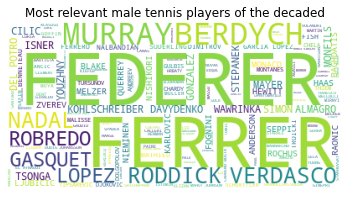

In [311]:
wordcloud(df_atp["Winner"], list_winners)

In [312]:
# I expected Nadal or jokovic to be bigger
# Anyway it is a word cloud based on some normalization text algorithm (I do not remember it was a tfd-id) 
# and therefor the output size does not just depend on the number of times that the word appears 
# but also on the frequencency. If Berdych played for a longer period of time and is more frequence 
# even with less victories than Nadal it can appear bigger in the cloud
print(dict_winner['Berdych T.'])
print(dict_winner['Federer R.'])
print(dict_winner['Nadal R.'])

581
1125
891


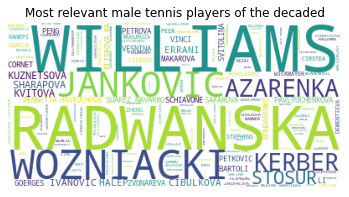

In [313]:
# Let's also take a look to the females. All the questions are about the male's organization
# We have again cases as 'Arruabarrena Vecino L.' and 'Arruabarrena-Vecino L.'
# Or'Badosa Gibert P.' and 'Badosa Gibert. P.'
# They have win many Williams, Radwanska and Wozniacki. I know the first one
df_wta["Winner"] = df_wta["Winner"].apply(lambda x: x.replace("-"," ").replace(".",". ").replace("  "," ").strip())
df_wta["Winner"] = df_wta["Winner"].apply(lambda x: x + ".")
df_wta["Winner"] = df_wta["Winner"].apply(lambda x: x.replace("..","."))
list_female_winners = df_wta["Winner"].unique().tolist()
wordcloud(df_wta["Winner"], list_female_winners)

### Question 2

In [314]:
# Since the column of the winners is already clean the second question is pretty easy
# first we clean the Loser column
df_atp["Loser"] = df_atp["Loser"].apply(lambda x: x.replace("-"," ").replace(".",". ").replace("  "," ").strip())
df_atp["Loser"] = df_atp["Loser"].apply(lambda x: x + ".")
df_atp["Loser"] = df_atp["Loser"].apply(lambda x: x.replace("..","."))

In [315]:
# Now we count Wsets and Lsets
# Trying to run the last cell I had some problems with "Lsets"
# Let's solve this before
df_atp["Lsets"].unique()

array([0.0, 1.0, 2.0, nan, '1.0', '0.0', '2.0', '1', '0', '2', '`1'],
      dtype=object)

In [316]:
# There is a '`1' string which does not let me convert the data into numeric
my_index = -1
for index, row in df_atp.iterrows():
        if (isinstance(row["Lsets"], str) and row["Lsets"]=='`1'):
            print("Got it")
            row["Lsets"]=1
            my_index = index
df_atp.loc[my_index,"Lsets"]=1
df_atp["Lsets"].unique()

Got it


array([0.0, 1.0, 2.0, nan, '1.0', '0.0', '2.0', '1', '0', '2'],
      dtype=object)

In [317]:
# We still need to change the nans
print(len([0 for value in  df_atp["Lsets"].isna() if value==True]))
print(len([0 for value in  df_atp["Wsets"].isna() if value==True]))

225
224


In [318]:
import numpy as np
df_atp["Lsets"].replace(np.nan,0, inplace=True)
df_atp["Wsets"].replace(np.nan,0, inplace=True)
counter = 0
for index, row in df_atp.iterrows():
    if row["Loser"]=="Federer R.":
        counter += float(row["Lsets"])
    if row["Winner"]=="Federer R.":
        counter += row["Wsets"]

In [319]:
A2 = "He won a total of "+str(int(counter))+" sets."
A2

'He won a total of 2705 sets.'

### Question 3

In [320]:
# For the next question we need a datetime format
# The format was "%Y-%m-%d" as a string
df_atp["Date"] = pd.to_datetime(df_atp["Date"], format="%Y-%m-%d")
A3_filter = (df_atp["Date"] > '2016-01-01') & (df_atp["Date"] <= '2017-12-31')
df_A3 = df_atp.loc[A3_filter]
counter = 0
for index, row in df_A3.iterrows():
    if row["Loser"]=="Federer R.":
        counter += float(row["Lsets"])
    if row["Winner"]=="Federer R.":
        counter += row["Wsets"]
A3 = "He won a total of "+str(int(counter))+" sets between 2016 and 2017."

In [321]:
A3

'He won a total of 182 sets between 2016 and 2017.'

### Question 4

In [322]:
# Since we have to compute the previous precent of victories for each player and and date we do with a function
def percent_of_past_victories(player, date, df):
    date_filter = (df["Date"] < date)
    df_past  = df[date_filter]
    past_victories = df_past[df_past["Winner"] == player].shape[0]
    past_defeats = df_past[df_past["Loser"] == player].shape[0]
    if  2 > (past_victories + past_defeats):
        return 0
    return past_victories / (past_victories + past_defeats)
# We filter based on the function and add a new column
df_ppv = df_atp.copy()
df_ppv["percentage_past_victories"] = df_ppv.apply(lambda x: percent_of_past_victories(x["Winner"],x["Date"],df_ppv), axis=1)

In [323]:
df_ppv.to_csv("percentage_past_victories.csv",index=False)

In [324]:
df_atp = pd.read_csv("percentage_past_victories.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (11,12,15,16,17,18,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [325]:
A4 = df_ppv[["Winner","percentage_past_victories"]]

In [326]:
Questions = {}
Questions["Who are the three ATP players with the most wins ?"] = A1
Questions["How many sets did the player “Federer R.” win in total ?"] = A2
Questions["How many sets did the player “Federer R.” win during the years 2016 and 2017 ?"] = A3
Questions["For each match, what is the percentage of victories of the winner in the past ?"] = A4

In [327]:
for question,answer in Questions.items():
    print(question)
    print("\n")
    print(answer)
    print("\n")

Who are the three ATP players with the most wins ?


The player who won more matches in the ATP was Federer R., with a total of 1125 victories. Followed by Nadal R. and Djokovic N..


How many sets did the player “Federer R.” win in total ?


He won a total of 2705 sets.


How many sets did the player “Federer R.” win during the years 2016 and 2017 ?


He won a total of 182 sets between 2016 and 2017.


For each match, what is the percentage of victories of the winner in the past ?


            Winner  percentage_past_victories
0       Dosedel S.                   0.000000
1       Enqvist T.                   0.000000
2        Escude N.                   0.000000
3       Federer R.                   0.000000
4      Fromberg R.                   0.000000
...            ...                        ...
52293    Zverev A.                   0.664032
52294  Djokovic N.                   0.830753
52295    Zverev A.                   0.665354
52296  Djokovic N.                   0.830928
52297

## Data preparation process

In [328]:
# Now we want predict the winners along the year 2017 for each match.
# I guess this depends mainly on four parameters:
# player1, player2, betting and date
# since it depends on the players but they do not always have the same physical condition, 
# and this can be more or less predict based on the date

### Selecting features and cleaning data
#### I am going to start cleaning a bit the columns
#### First I erase the unuseful columns and some nans

In [457]:
# I want to detect the nans easily
nan_vals = ["nan","Nan","None","Na","NA","NaN"]
df_atp = pd.read_csv("percentage_past_victories.csv", na_values = nan_vals)

In [458]:
# Some of the columns do not provide so much information about the possible winner, 
# in fact, we got them after the match
# Like W1,...,L5
cols = df_atp.columns.tolist()
match_details_cols = cols[13:23]
df_atp.drop(columns=match_details_cols, inplace=True)

In [459]:
# We hace cleanned just the Winner column and the Loser
# If we take a look to the number nan objects we can se that until "Comment" 
# there are just a few in WRank and LRank
# I consider this columns important since they reflect the current player's success and 
# replacing by 0 makes understand to the model that he is the best, and the maximum value the worst.
# There are also values NR (not ranked), for these I guess the best option is to replace them by the AVG
df_atp.isna().sum()

ATP                              0
Location                         0
Tournament                       0
Date                             0
Series                           0
Court                            0
Surface                          0
Round                            0
Best of                          0
Winner                           0
Loser                            0
WRank                           15
LRank                           78
Wsets                            0
Lsets                            0
Comment                          0
CBW                          34792
CBL                          34792
GBW                          47243
GBL                          47243
IWW                          38940
IWL                          38940
SBW                          46874
SBL                          46874
B365W                         8655
B365L                         8632
B&WW                         51201
B&WL                         51201
EXW                 

In [460]:
# We delete the rows where WRank or LRank are nan, which are not the same that not ranked
df_atp.dropna(axis="index", how="any", subset = ["WRank","LRank"], inplace=True)

# We also delete Comment
df_atp.drop(columns=["Comment"],inplace=True)
# And ATP it's just the number of the tennis match
df_atp.drop(columns=["ATP"],inplace=True)
# We might also delete the columns for the sets since they are a posteriori, 
# as well as, the percentage_past_victories, which is based on the winner
df_atp.drop(columns=["Wsets","Lsets","percentage_past_victories"],inplace=True)

#### The data is pretty dirty so I going to check those columns which should be numeric and clean them

In [461]:
# Taking a look to the columns values and trying to convert them to float I realized that many of them 
# have string values that block the conversion. So I write a function to check those values.
# It fact it's a variant of the loop that I used for winner before
def str_checker(df, col_name):
    weird_values = []
    for index, row in df.iterrows():
        if isinstance(row[col_name],str):
            try:
                row[col_name]=float(row[col_name])
            except:
                #print("Got it")
                #print(row[col_name])
                weird_values.append(row[col_name])
    return weird_values

#### WRank

In [462]:
# There is a problem for one row in WRank:
# I have checked the not numeric value and I replace it by the avg of the column even if it is Fish M. in 2000
# We could drop it but it also appears in LRank the value "NR" and I guess it is not ranked
output = str_checker(df_atp,"WRank")
mylist = df_atp["WRank"].tolist()
ocurrences = mylist.count("NR")
for i in range(ocurrences):
    mylist.remove("NR")
mylist = np.asarray([float(x) for x in mylist])
WR_mean = str(int(mylist.mean()))
# The following lines were to check the row, but they are not necessary
filter_1 = df_atp["WRank"] == 'NR'
myindex = df_atp["WRank"].loc[filter_1].index
name = str(df_atp.loc[myindex,"Winner"])

In [463]:
name

'744    Fish M.\nName: Winner, dtype: object'

#### LRank

In [464]:
# I we get the mean of the loser to replace the No-rancked values
output = str_checker(df_atp,"LRank")
mylist = df_atp["LRank"].tolist()
ocurrences = mylist.count("NR")
for i in range(ocurrences):
    mylist.remove("NR")
mylist = np.asarray([float(x) for x in mylist])
LR_mean = str(int(mylist.mean()))

In [465]:
# I guess the "Key to match betting odds data" columns are useful since they are based on the experience 
# of the people betting in tennis and they must be a good input: from CBW to SJL
# There was a ".," at some point of "EXW" giving problems. We need all of them numeric
df_atp["EXW"] = df_atp["EXW"].apply(lambda x: x.replace(".,",".") if isinstance(x,str) else x)
df_atp["EXW"] = df_atp["EXW"].astype(float)

# We also clean with what we have checked before for WRank
df_atp["WRank"] = df_atp["WRank"].apply(lambda x: x.replace("NR",WR_mean) if isinstance(x,str) else x)
df_atp["WRank"] = df_atp["WRank"].astype(float)

# We also clean with what we have checked before for LRank
df_atp["LRank"] = df_atp["LRank"].apply(lambda x: x.replace("NR",LR_mean) if isinstance(x,str) else x)
df_atp["LRank"] = df_atp["LRank"].astype(float)
# I do not see "Best of" like a important feature and moreover it is df_atp["Best of"].unique() = [3.,5.]
df_atp.drop(columns=["Best of"],inplace=True)

### Passing categorical data to integers

In [466]:
# Now tha data looks better, but we still need to change the categorical values to numeric.
# We are going to do with a function except where the order matters, like round. 
# Some people can get more stressed when it is a final
df_atp.info()
cat_cols = df_atp.columns.tolist()[0:10]
cat_cols
for i in range(len(cat_cols)):
    print(df_atp[cat_cols[i]].unique())
    print("\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52205 entries, 0 to 52297
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    52205 non-null  object 
 1   Tournament  52205 non-null  object 
 2   Date        52205 non-null  object 
 3   Series      52205 non-null  object 
 4   Court       52205 non-null  object 
 5   Surface     52205 non-null  object 
 6   Round       52205 non-null  object 
 7   Winner      52205 non-null  object 
 8   Loser       52205 non-null  object 
 9   WRank       52205 non-null  float64
 10  LRank       52205 non-null  float64
 11  CBW         17492 non-null  float64
 12  CBL         17492 non-null  float64
 13  GBW         5055 non-null   float64
 14  GBL         5055 non-null   float64
 15  IWW         13343 non-null  float64
 16  IWL         13343 non-null  float64
 17  SBW         5423 non-null   float64
 18  SBL         5423 non-null   float64
 19  B365W       43562 non-nul

In [467]:
# We use this function with an action movie's name to convert the dataframe and get a dictionary
def numericator(col_name):
    global df_atp
    col_cats = df_atp[col_name].unique()
    col_dict = dict(zip(col_cats,range(len(col_cats))))
    df_atp[col_name] = df_atp[col_name].apply(lambda x: col_dict[x])
    return col_dict

In [468]:
Location_dict = numericator("Location")
Tournament_dict = numericator("Tournament")
Series_dict = numericator("Series")
Court_dict = numericator("Court")
Surface_dict = numericator("Surface")
Winner_dict = numericator("Winner")
Loser_dict = numericator("Loser")

In [469]:
# I prefer to give an order structure to the Round case
col_cats = ['Round Robin', '1st Round', '2nd Round', '3rd Round', '4th Round', 'Quarterfinals', 'Semifinals', 'The Final']
Round_dict = dict(zip(col_cats,range(len(col_cats))))
df_atp["Round"] = df_atp["Round"].apply(lambda x: Round_dict[x])

In [470]:
# Saving 2017 indexes
# Before moving to integers this column I am going to save the indexes from 2017 for later.
# The integer forman is from 1 to 365. The year will be lost.
# They come in cronologic order so it's a range, but I prefer to save all of them just in case
filter_2017 = (df_atp["Date"] > '2017-01-01') & (df_atp["Date"] <= '2017-12-31')
df_2017 = df_atp.loc[filter_2017]
array_2017 = np.asarray(df_2017.index.tolist())
my_max = array_2017.max()
my_min = array_2017.min()

In [445]:
# We still need to recover the datetime format and integer
df_atp["Date"] = pd.to_datetime(df_atp["Date"], format="%Y-%m-%d")
df_atp["Date"] = df_atp.apply(lambda x: x["Date"].strftime('%j'),axis=1)
df_atp["Date"] = pd.to_numeric(df_atp["Date"])

In [345]:
# Let's do a check point again
df_atp.to_csv("percentage_past_victories_2.csv",index=False)

In [397]:
df_atp = pd.read_csv("percentage_past_victories_2.csv")

### Shuffling and normalization

In [398]:
# Finally all the data is numeric. We just need to do three things:
# 1. normalize those which are data (since they correspond to not catgorical, not like Surface). Also WRank
# 2. define the label and shuffle Winner-Loser columns. Otherwise the output is clearly the Winner column
# 3. Split the data and shuffle the rows
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52205 entries, 0 to 52204
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    52205 non-null  int64  
 1   Tournament  52205 non-null  int64  
 2   Date        52205 non-null  int64  
 3   Series      52205 non-null  int64  
 4   Court       52205 non-null  int64  
 5   Surface     52205 non-null  int64  
 6   Round       52205 non-null  int64  
 7   Winner      52205 non-null  int64  
 8   Loser       52205 non-null  int64  
 9   WRank       52205 non-null  float64
 10  LRank       52205 non-null  float64
 11  CBW         17492 non-null  float64
 12  CBL         17492 non-null  float64
 13  GBW         5055 non-null   float64
 14  GBL         5055 non-null   float64
 15  IWW         13343 non-null  float64
 16  IWL         13343 non-null  float64
 17  SBW         5423 non-null   float64
 18  SBL         5423 non-null   float64
 19  B365W       43562 non-nul

In [399]:
# First, before normalizing, we replace the nans by the mean for those columns which are not originally categorical
flt_cols = df_atp.columns.tolist()[9:]
for col in flt_cols:
    mean = df_atp[col].mean()
    df_atp[col] = df_atp[col].fillna(mean)

In [400]:
# We normalize also the ranck values
from sklearn.utils import shuffle
from sklearn import preprocessing
MMS = preprocessing.MinMaxScaler()

# Let's be sure that the indexes will match later
df_atp.sort_index()

# Normalization: we do it before spliting the data sets to have the same distribution for train and test
df = df_atp[flt_cols]
df_atp_cols = df.columns.tolist()
df_atp_rows = df.index.tolist()
df_atp_values = df.values
scaled_atp = MMS.fit_transform(df_atp_values)
df = pd.DataFrame(data = scaled_atp, index = df_atp_rows, columns = df_atp_cols)

In [401]:
# We create the almost final df_atp where there are no nans and every column is an aceptable input for the model
df_atp = pd.concat([df_atp.iloc[:,0:9], df], axis=1, sort=False)

# We create the label column
df_atp["Label"] = df_atp["Winner"]

### Preparing the data structure for the problem

there are many possible ways of approaching this problem. We have already decided the features wich are going 
to be used by the model. Now, we could abord it as a classification problem with more of 900 possible outputs, 
but we could also reduce it two two labels 1 and 0, where 0 is the first palyer and 1 the second. 
This has some advantages: the less amount of labels, less complicated is the output 
and less amount of data is needed to train it.
Choosing the binary classification reduce the possibility of folling down into underfitting later.
Maybe 52k samples are not enough to do a 900 classification, but I am pretty sure that we can get a model for 2.

To do so we need to manipulate a bit the data. First we still have a feature "Winner" which is equal to the label. 
To make the model ignore the winner player wi are going to switch those columns related with the winner and the loser for half of the cases. 
Second: For those samples which are not switched we are going to label them like 1 and for those switched we are going to label them as 0. 
In other words, we are going to pass from a

            (winner,loser)       -->   winner 
model to a 

            (player1,player2)    -->   player1 or player2  (0 | 1)
model

In [402]:
# We select those columns that we want to switch and the complementaries 
# We are going to use implicitly that the columnL and columnW are always consecutive
switching_cols = df_atp.columns.tolist()[7:-1]
loser_cols = switching_cols[1::2]
winner_cols = switching_cols[0::2]
not_switching_cols = [x for x in df_atp.columns.tolist() if x not in switching_cols]

# Let's check the correspondance W-L
for i in range(len(winner_cols)):
    print(winner_cols[i] + "\t" + loser_cols[i])
print("\n")

Winner	Loser
WRank	LRank
CBW	CBL
GBW	GBL
IWW	IWL
SBW	SBL
B365W	B365L
B&WW	B&WL
EXW	EXL
PSW	PSL
WPts	LPts
UBW	UBL
LBW	LBL
SJW	SJL
MaxW	MaxL
AvgW	AvgL




In [403]:
# We put the columns in an order that we can easily switch
cols = not_switching_cols + loser_cols + winner_cols
df_atp = df_atp[cols]

# The switched case will have the following order for the cols
switched_cols = not_switching_cols + winner_cols + loser_cols

In [404]:
# Let's check the correspondance W-L
for i in range(len(switched_cols)):
    print(cols[i] + "\t" + switched_cols[i])
print("\n")

Location	Location
Tournament	Tournament
Date	Date
Series	Series
Court	Court
Surface	Surface
Round	Round
Label	Label
Loser	Winner
LRank	WRank
CBL	CBW
GBL	GBW
IWL	IWW
SBL	SBW
B365L	B365W
B&WL	B&WW
EXL	EXW
PSL	PSW
LPts	WPts
UBL	UBW
LBL	LBW
SJL	SJW
MaxL	MaxW
AvgL	AvgW
Winner	Loser
WRank	LRank
CBW	CBL
GBW	GBL
IWW	IWL
SBW	SBL
B365W	B365L
B&WW	B&WL
EXW	EXL
PSW	PSL
WPts	LPts
UBW	UBL
LBW	LBL
SJW	SJL
MaxW	MaxL
AvgW	AvgL




In [405]:
# We are going to switch half of the rows
df_switched = df_atp.sample(frac = 0.5, axis=0)

# We take the complementary to be preserved and save the indexes for later
list_switched_indexes = df_switched.index.tolist()
filter_switched = df_atp.index.isin(list_switched_indexes)
df_not_switched = df_atp.loc[~filter_switched]

In [406]:
# Now we get the values inside the DF and switch the columns
df_switched_values = df_switched.values
df_switched = pd.DataFrame(data = df_switched_values, index = list_switched_indexes, columns = switched_cols)

In [407]:
# We want to concatenate both data frames using the cols so we make match it with not switched
df_switched = df_switched[cols]

In [408]:
# Change labels and concatenate
df_switched["Label"] = df_switched["Label"].apply(lambda x: 1)
df_not_switched["Label"] = df_not_switched["Label"].apply(lambda x: 0)
# In fact, I don't going to use the following. It's to have a check point since I am going to group by label later
df = pd.concat([df_not_switched,df_switched])
df = shuffle(df)

<ipython-input-408-3942ca9febaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_switched["Label"] = df_not_switched["Label"].apply(lambda x: 0)


In [410]:
# Good moment for a save point
# But we must remember that we saved the indexes for 2017
df.to_csv("df_prepared.csv",index=True)

### Split into train and test

In [536]:
df = pd.read_csv("df_prepared.csv")
df.set_index(df.columns.tolist()[0],inplace=True)
df.index.name = ""

In [537]:
# We group by label to see if there's so much difference
grouped = df.groupby(by=["Label"])

df_0 = grouped.get_group(0)
df_1 = grouped.get_group(1)

df_0 = shuffle(df_0)
df_1 = shuffle(df_1)

# Get the train sets
train_0 = df_0.sample(frac = 0.8, axis=0)
train_1 = df_1.sample(frac = 0.8, axis=0)

# getting their indexes and creating filters
list_0_train = train_0.index.tolist()
list_1_train = train_1.index.tolist()

# Boolean arrays for the indexes
filter_0 = df_0.index.isin(list_0_train)
filter_1 = df_1.index.isin(list_1_train)

# take as test the complementaries
test_0 = df_0.loc[~filter_0]
test_1 = df_1.loc[~filter_1]

# We join again the data sets and shuffle to don't send the batches by label
train = shuffle(train_0.append(train_1, ignore_index = False))
test = shuffle(test_0.append(test_1, ignore_index = False))

# Split into X and Y
list_train = train.columns.tolist()
list_train.remove("Label")
list_test = test.columns.tolist()
list_test.remove("Label")
X_train = train[list_train]
Y_train = train["Label"]
X_test = test[list_test]
Y_test = test["Label"]

## Modeling phase and Evaluation

Since we have reduced it to a binary classification problem there are many classification algorithms that we can apply. We are going to see the accuracy for each one of them since the goal is betting but get the highest number True Positive and True negative. If we would like to spend some money betting the Precision would be a better option since we just want to bet when we are sure.

We are going to use the saved indexes to select the subset of the test set from 2017. 
We could also train just with 2017 but we would lose a lot of information, there are around 2.6k samples.
So, we train with the whole data, and then we predict in general and just for 2017.

Even it is not necessary there is a remarkable difference in running time. For a test like this does not matter so much but for real projects yes, so I am going to add the running time to the models.

In [538]:
# I few SKL tools
import time
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
from sklearn import svm

In [539]:
# Since the goal is to predict fro 2017 we take those from the test set
filter_2017_3 = (test.index.isin(list_2017))
df_2017 = test.loc[filter_2017_3]
X_test_2017 = df_2017[list_test]
Y_test_2017 = df_2017["Label"]

###    MULTINOMIAL NAIVE BAYES

In [540]:
# Let's see how it predicts in general
start = time.time()
NB.fit(X = X_train,y = Y_train)
NB_pred = NB.predict(X_test)
acc = metrics.accuracy_score(Y_test,NB_pred)
end = time.time()
print("The Multinomial NB model predicts with an accuracy of {:.2f} % with a cost of time {:.4f} s".format(acc*100,end-start))

The Multinomial NB model predicts with an accuracy of 71.89 % with a cost of time 0.0199 s


In [541]:
# Let's see how it works when restriction to the year 2017
# It truns out that it is even better. 
start = time.time()
NB.fit(X = X_train,y = Y_train)
NB_pred = NB.predict(X_test_2017)
acc = metrics.accuracy_score(Y_test_2017,NB_pred)
end = time.time()
print("The Multinomial NB model predicts with an accuracy of {:.2f}% for 2017 with a cost of time {:.4f} s".format(acc*100,end-start))

The Multinomial NB model predicts with an accuracy of 83.10% for 2017 with a cost of time 0.0156 s


###    RANDOM FORESTS 

In [542]:
# Randomforest are a good option for the categorial part of the data
# So far it produce a prediction close to 1
# In fact, the first time it gave me 1.0 and I was not sure if there was a mistake 

In [543]:
# Random forest in general
start = time.time()
RF = RandomForestClassifier(max_depth=20,max_features=0.5)
RF.fit(X = X_train,y = Y_train)
RF_pred = RF.predict(X_test)
acc = metrics.accuracy_score(Y_test, RF_pred)
end = time.time()
print("The RF model predicts with an accuracy of {:.2f}% for 2017 with a cost of time {:.4f} s".format(acc*100,end-start))

The RF model predicts with an accuracy of 100.00% for 2017 with a cost of time 4.1660 s


In [544]:
# Random forest in 2017
start = time.time()
RF = RandomForestClassifier(max_depth=20,max_features=0.5)
RF.fit(X = X_train,y = Y_train)
RF_pred = RF.predict(X_test_2017)
acc = metrics.accuracy_score(Y_test_2017, RF_pred)
end = time.time()
print("The RF model predicts with an accuracy of {:.2f}% for 2017 with a cost of time {:.4f} s".format(acc*100,end-start))

The RF model predicts with an accuracy of 100.00% for 2017 with a cost of time 4.3267 s


### S.V.M. 

In [545]:
# By default the kernel is rbf. The complexity of SVM is O(n_samples^2 * n_features) 
# so it can take some time and then I am going to select 11 features for the model.
# They are going to be the categorical and the two players
train_list = X_train.columns.tolist()
svm_list = train_list[:9]+train_list[23:25]

In [546]:
# S.V.M. with restricted features in general
start = time.time()
classf = svm.SVC()
classf.fit(X_train[svm_list],y = Y_train)
classf_pred = classf.predict(X_test[svm_list])
acc = metrics.accuracy_score(Y_test, classf_pred)
end = time.time()
print("The restricted SVM model predicts with an accuracy of {:.2f}% with a cost of time {:.4f} s".format(acc*100,end-start))

The restricted SVM model predicts with an accuracy of 71.91% with a cost of time 52.7764 s


In [547]:
# S.V.M. with restricted features in 2017
# Here I skip fiting the model since it's already done and I not really need it
classf_pred = classf.predict(X_test_2017[svm_list])
acc = metrics.accuracy_score(Y_test_2017, classf_pred)
print("The restricted SVM model predicts with an accuracy of {:.2f}% in 2017 with a cost of time {:.4f} s".format(acc*100,end-start))

The restricted SVM model predicts with an accuracy of 83.50% in 2017 with a cost of time 52.7764 s


In [548]:
# S.V.M. in general
start = time.time()
classf = svm.SVC()
classf.fit(X_train,y = Y_train)
classf_pred = classf.predict(X_test)
acc = metrics.accuracy_score(Y_test, classf_pred)
end = time.time()
print("The SVM model predicts with an accuracy of {:.2f}% with a cost of time {:.4f} s".format(acc*100,end-start))

The SVM model predicts with an accuracy of 71.81% with a cost of time 115.0036 s


In [550]:
# S.V.M. with restricted features in 2017
classf_pred = classf.predict(X_test_2017)
acc = metrics.accuracy_score(Y_test_2017, classf_pred)
print("The restricted SVM model predicts with an accuracy of {:.2f}% in 2017 with a cost of time {:.4f} s".format(acc*100,end-start))

The restricted SVM model predicts with an accuracy of 83.50% in 2017 with a cost of time 115.0036 s


### MULTILAYER PERCEPTRON CLASSIFIER (NN)

We could applied the simple logistic regression from sklearn, but probably we would get worse accuracy than the models before, logistic is not the best. But if you compose many of them you get a NN, a multilayer perceptron classifier to be precise. 

Since it is a simple classifier I will avoid Convolutions or LSTM, just common layers. In fact, the Random Forest solution will probably stay the best. 

In [586]:
# Libraries for DL
import tensorflow as tf
from tensorflow import keras
import keras
from keras import backend as K # For the F1 score
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Activation, Reshape, Dropout#, Input

In [587]:
# This cell has been copied from my old code
def recall_m(Y_true, Y_pred):
    true_positives = K.sum(K.round(K.clip(Y_true * Y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(Y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(Y_true, Y_pred):
    true_positives = K.sum(K.round(K.clip(Y_true * Y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(Y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(Y_true, Y_pred):
    precision = precision_m(Y_true, Y_pred)
    recall = recall_m(Y_true, Y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [602]:
model = Sequential()
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dense(300))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation("elu"))
model.add(Dense(50))
model.add(Activation("elu"))
model.add(Dense(1))

In [603]:
train = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train.shuffle(len(df)).batch(10)

In [604]:
my_optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.2,
    beta_1=0.7,
    beta_2=0.7,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")
model.compile(loss='binary_crossentropy', optimizer="adam",
               metrics=['acc',f1_m, precision_m, recall_m])

In [592]:
# Training and plotting
history = model.fit(train_dataset,epochs=20,
                    validation_data=(X_test, Y_test),
                    batch_size=10) #,callbacks=[cp_callback, tensorboard_callback])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/20
4177/4177 [==============================] - 10s 3ms/step - loss: 5.0440 - acc: 0.6600 - f1_m: 0.6678 - precision_m: 0.6469 - recall_m: 0.7418 - val_loss: 4.7100 - val_acc: 0.6842 - val_f1_m: 0.6603 - val_precision_m: 0.6895 - val_recall_m: 0.6862
Epoch 2/20
4177/4177 [==============================] - 10s 2ms/step - loss: 4.7335 - acc: 0.6843 - f1_m: 0.6726 - precision_m: 0.6901 - recall_m: 0.7052 - val_loss: 4.6936 - val_acc: 0.6857 - val_f1_m: 0.6441 - val_precision_m: 0.7023 - val_recall_m: 0.6412
Epoch 3/20
4177/4177 [==============================] - 11s 3ms/step - loss: 4.1808 - acc: 0.6710 - f1_m: 0.6421 - precision_m: 0.6936 - recall_m: 0.6459 - val_loss: 4.8086 - val_acc: 0.6668 - val_f1_m: 0.6175 - val_precision_m: 0.6902 - val_recall_m: 0.6046
Epoch 4/20
4177/4177 [==============================] - 10s 2ms/step - loss: 1.8076 - acc: 0.6410 - f1_m: 0.5751 - precision_m: 0.6414 - recall_m: 0.5740 - val_loss: 0.5030 - val_acc: 0.7230 - val_f1_m: 0.7064 - val_precisi

In [593]:
# Model's summary 4
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 200)               8000      
_________________________________________________________________
batch_normalization_5 (Batch (None, 200)               800       
_________________________________________________________________
activation_45 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_6 (Batch (None, 300)               1200      
_________________________________________________________________
activation_46 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 100)              

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


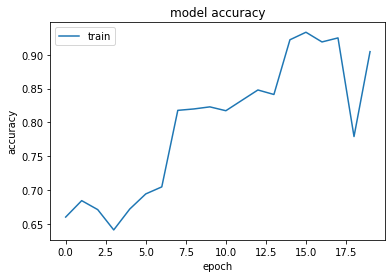

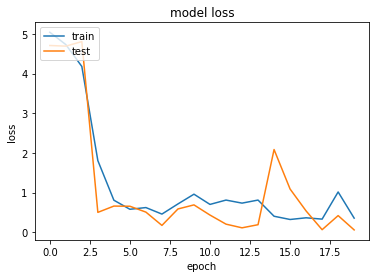

In [594]:
# We summarize the history for accuracy
print(history.history.keys())
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# We summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Final NN model
Last model was not bad.
It took longer than the other models and it looks like it finds a minimum but it gets out because of the adams optimization.
Probably the best option here is the following: we create a checkpoint for each epoch of the training process 
and we do an early stop when the accuracy is over 90% and the loss for the test below 0.5.
In practice, I save the model after each epoch and then pick the best one saved.

In [606]:
model_5 = Sequential()
model_5.add(Dense(200))
model_5.add(BatchNormalization())
model_5.add(Activation("elu"))
model_5.add(Dense(300))
model_5.add(BatchNormalization())
model_5.add(Activation("elu"))
model_5.add(Dense(300))
model_5.add(BatchNormalization())
model_5.add(Activation("elu"))
model_5.add(Dense(100))
model_5.add(BatchNormalization())
model_5.add(Activation("elu"))
model_5.add(Dense(50))
model_5.add(BatchNormalization())
model_5.add(Activation("elu"))
model_5.add(Dense(1))

In [607]:
# Model's check point
import datetime
import os
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

name = "model_5"

timestr = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name = 'Sentiment_classifier_res_net_-' + timestr

checkpoint_path = "/home/alejo/Desktop/Cien/Cien_DS_Test/checkpoints/"+name+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

# save model after each epoch
cp_callback = ModelCheckpoint(filepath = checkpoint_path, verbose=1)

tensorboard_callback = TensorBoard(log_dir = 'tensorboard_logs/'+name, histogram_freq=1)

In [608]:
# Training and plotting
history = model.fit(train_dataset,epochs=20,
                    validation_data=(X_test, Y_test),
                    batch_size=10) #,callbacks=[cp_callback, tensorboard_callback])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch 1/20
4177/4177 [==============================] - 16s 4ms/step - loss: 1.1252 - acc: 0.6621 - f1_m: 0.6353 - precision_m: 0.6872 - recall_m: 0.6566 - val_loss: 0.6003 - val_acc: 0.6900 - val_f1_m: 0.6669 - val_precision_m: 0.6932 - val_recall_m: 0.6884
Epoch 2/20
4177/4177 [==============================] - 16s 4ms/step - loss: 0.7390 - acc: 0.6973 - f1_m: 0.6864 - precision_m: 0.7082 - recall_m: 0.7220 - val_loss: 0.5320 - val_acc: 0.7213 - val_f1_m: 0.6875 - val_precision_m: 0.7392 - val_recall_m: 0.6869
Epoch 3/20
4177/4177 [==============================] - 14s 3ms/step - loss: 0.6884 - acc: 0.6904 - f1_m: 0.6933 - precision_m: 0.6850 - recall_m: 0.7589 - val_loss: 0.5087 - val_acc: 0.7173 - val_f1_m: 0.7204 - val_precision_m: 0.6871 - val_recall_m: 0.8043
Epoch 4/20
4177/4177 [==============================] - 15s 4ms/step - loss: 0.5174 - acc: 0.7771 - f1_m: 0.7777 - precision_m: 0.7704 - recall_m: 0.8349 - val_loss: 0.5308 - val_acc: 0.7279 - val_f1_m: 0.7061 - val_precisi

In [609]:
# Model's summary 5
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 200)               8000      
_________________________________________________________________
batch_normalization_13 (Batc (None, 200)               800       
_________________________________________________________________
activation_54 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_14 (Batc (None, 300)               1200      
_________________________________________________________________
activation_55 (Activation)   (None, 300)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 300)              

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


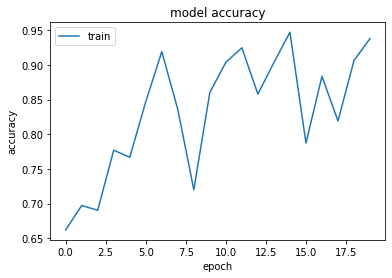

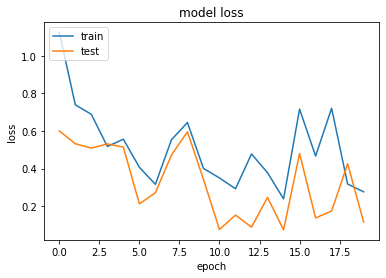

In [612]:
# We summarize the history for accuracy
print(history.history.keys())
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# We summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The best model with NN is model_5 at epoch 15 with:

        Test loss: 0.0733 - Test accuracy: 99.3%

I have it my computer and I can send it but in the instructions it says that might send just the notebook.
Anyway the output of the cell can be readen.

REMARK: I did not saved the Test's accuracy to plot it later but it can be checked.

## Conclusions

Chosing the model:

    I would chose the Random Forest model and in its absence the final NN. 
    The Random forest has the highst accuracy and takes a few seconds. 
    The final NN is close with the 99.3% but moreover is slower. 
    I would keep these two and then depending of the goal of the project use some of them.

Remarks about the test:

    I like it in general and I feel satisfied with the result. The biggest part of this test is cleaning the data.
    In fact, just until the models took me a bit more than 4 hours given for the whole test. 
    The model's part was around one hour and half (part of the code like the f1 function come from my older code),
    so it was pretty fast. 
    I started on the afternoon of Oct 6th and finished the last model on the evening of Oct 8th,
    with breaks in the middle.
    
If I would have more time: 
    
    Well, in fact, it took me more than 6 hours. But if would have more time I would clean question 4. 
    It was done fast and takes time to be run. Probably defining the dataframe as global would be faster.
    I am not sure now. I would review the test accuracy, I forgot to write it and since I check the data more
    instead than the graphics. I also had a plot with Federer, Nadal and the Djokovic vistories along the time,
    but it was ugly and would have to think a better way to plot the data, so I have erased it.
    I would also do that. I would try other models from SKL, and check the results for 2017 with NN.
    I do not forgot it. I have just exceded the time.
    
I guess the rest of the observations can be found along the notebook. I tend to comment a lot explaining my code.